In [4]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Read data from the spreadsheet
data = pd.read_csv("cleaned_mlready_combinedData1.csv")

In [5]:
# check out fire and no fire ratio
data["Fire"].value_counts()

0    7156
1     115
Name: Fire, dtype: int64

In [6]:
# divide data into train, and testing
X = data.copy()
y = X['Fire']
X = X.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
#Default training set, get a model baseline
clf_base = DecisionTreeClassifier(random_state=4)
clf_base = clf_base.fit(X_train, y_train)

In [8]:
#baseline predictions, amd confusion matrix of the baseline model
prediction_base = clf_base.predict(X_test)
confusion_matrix(y_test, prediction_base, labels=[0,1])

array([[1407,   19],
       [  28,    1]], dtype=int64)

In [9]:
#look at the importance of each feature
feature_names = X.columns
pd.DataFrame(clf_base.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.070050
T_DAILY_AVG,0.044634
SOLARAD_DAILY,0.118375
SUR_TEMP_DAILY_MAX,0.054854
SUR_TEMP_DAILY_AVG,0.133831
RH_DAILY_MIN,0.110452
RH_DAILY_AVG,0.026955
SOIL_MOISTURE_5_DAILY,0.060764
SOIL_MOISTURE_10_DAILY,0.025354
SOIL_MOISTURE_20_DAILY,0.058414


In [10]:
#Get report on base model
print(classification_report(y_test,prediction_base))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1426
           1       0.05      0.03      0.04        29

    accuracy                           0.97      1455
   macro avg       0.52      0.51      0.51      1455
weighted avg       0.96      0.97      0.96      1455



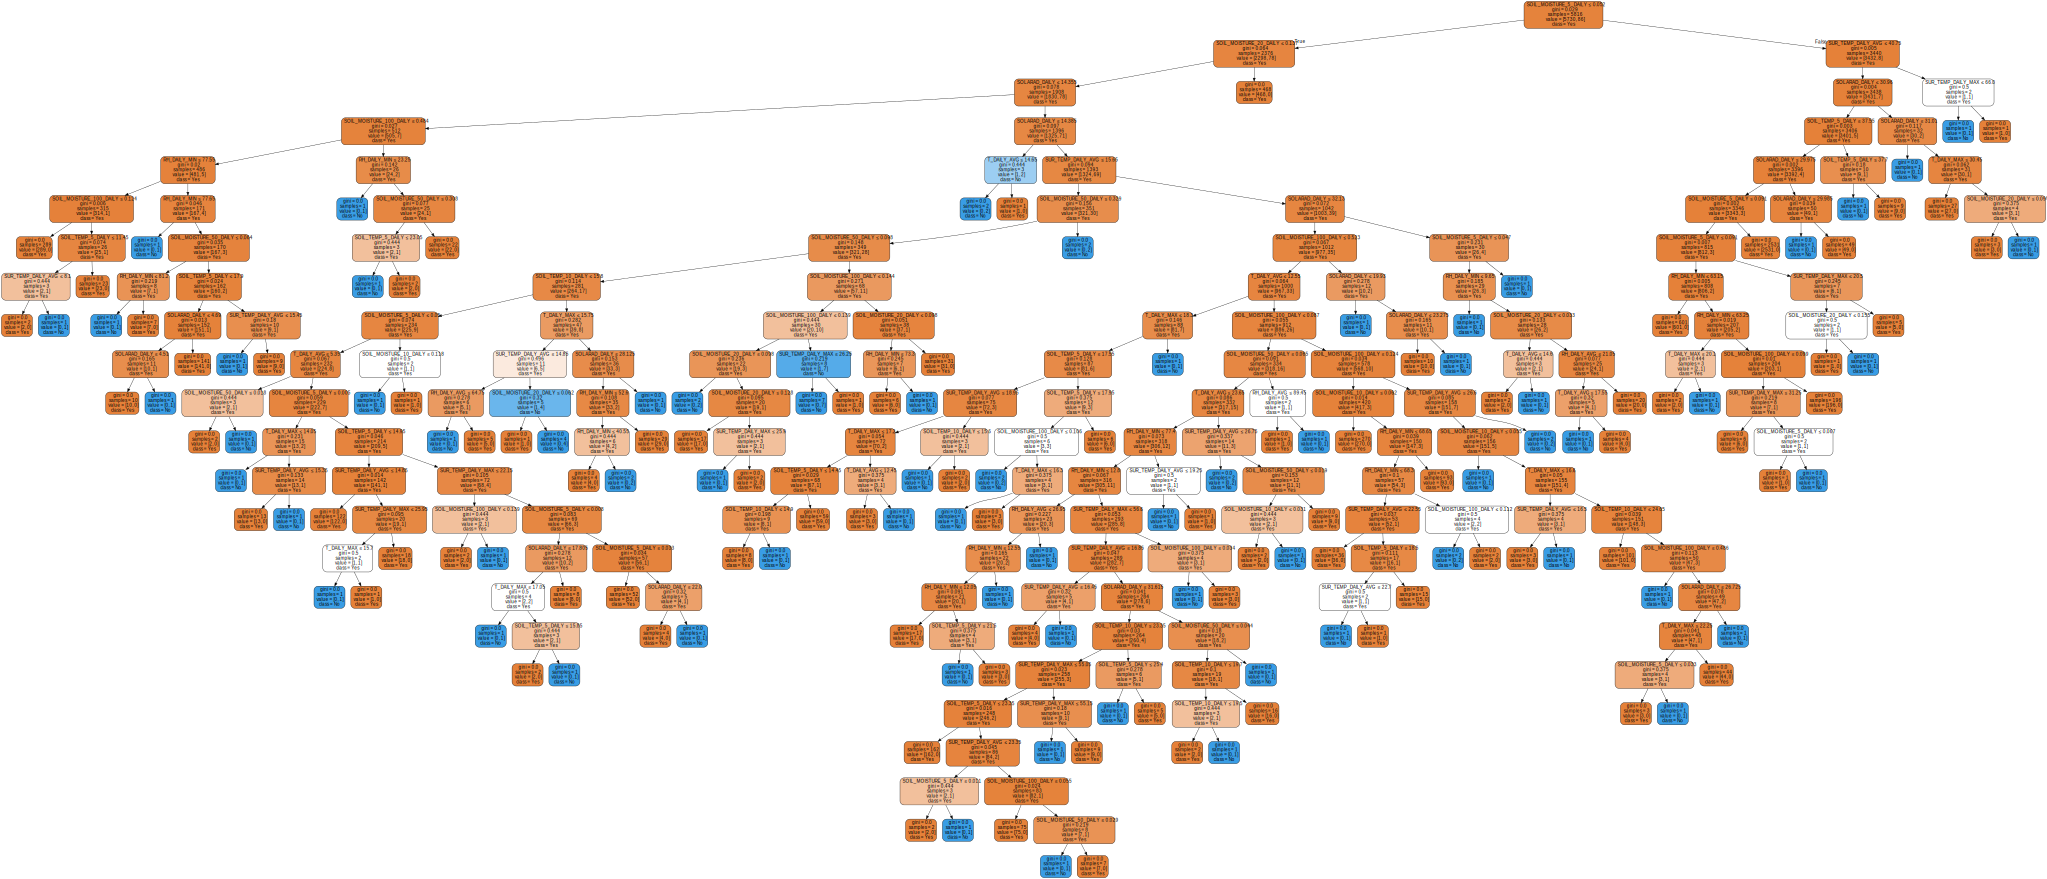

In [12]:
#Base model decision tree structure view
visualization = tree.export_graphviz(clf_base, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [13]:
#cross validation of the base model:Accuracy
score = cross_val_score(clf_base, X, y, cv= 5, scoring="accuracy")
score

array([0.93814433, 0.95048143, 0.87001376, 0.97317744, 0.95667125])

In [14]:
#Tuned decision tree training with no oversampling
clf_Iteration1 = DecisionTreeClassifier(class_weight={1:65,0:1}, max_depth=8, criterion="entropy", random_state=4)
clf_Iteration1 = clf_Iteration1.fit(X_train, y_train)

In [15]:
#make another prediction on the new model and show confusion matrix of the new model on test data
predictions_iteration1 = clf_Iteration1.predict(X_test)
confusion_matrix(y_test, predictions_iteration1, labels=[0,1])

array([[1014,  412],
       [   6,   23]], dtype=int64)

In [16]:
#look at the importance of each feature of the improved model
clf_Iteration1.feature_importances_
feature_names = X.columns
pd.DataFrame(clf_Iteration1.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.000000
T_DAILY_AVG,0.000000
SOLARAD_DAILY,0.040049
SUR_TEMP_DAILY_MAX,0.000000
SUR_TEMP_DAILY_AVG,0.000000
RH_DAILY_MIN,0.113591
RH_DAILY_AVG,0.014852
SOIL_MOISTURE_5_DAILY,0.514199
SOIL_MOISTURE_10_DAILY,0.058686
SOIL_MOISTURE_20_DAILY,0.137483


In [17]:
#Get report on base model
print(classification_report(y_test,predictions_iteration1))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1426
           1       0.05      0.79      0.10        29

    accuracy                           0.71      1455
   macro avg       0.52      0.75      0.46      1455
weighted avg       0.98      0.71      0.81      1455



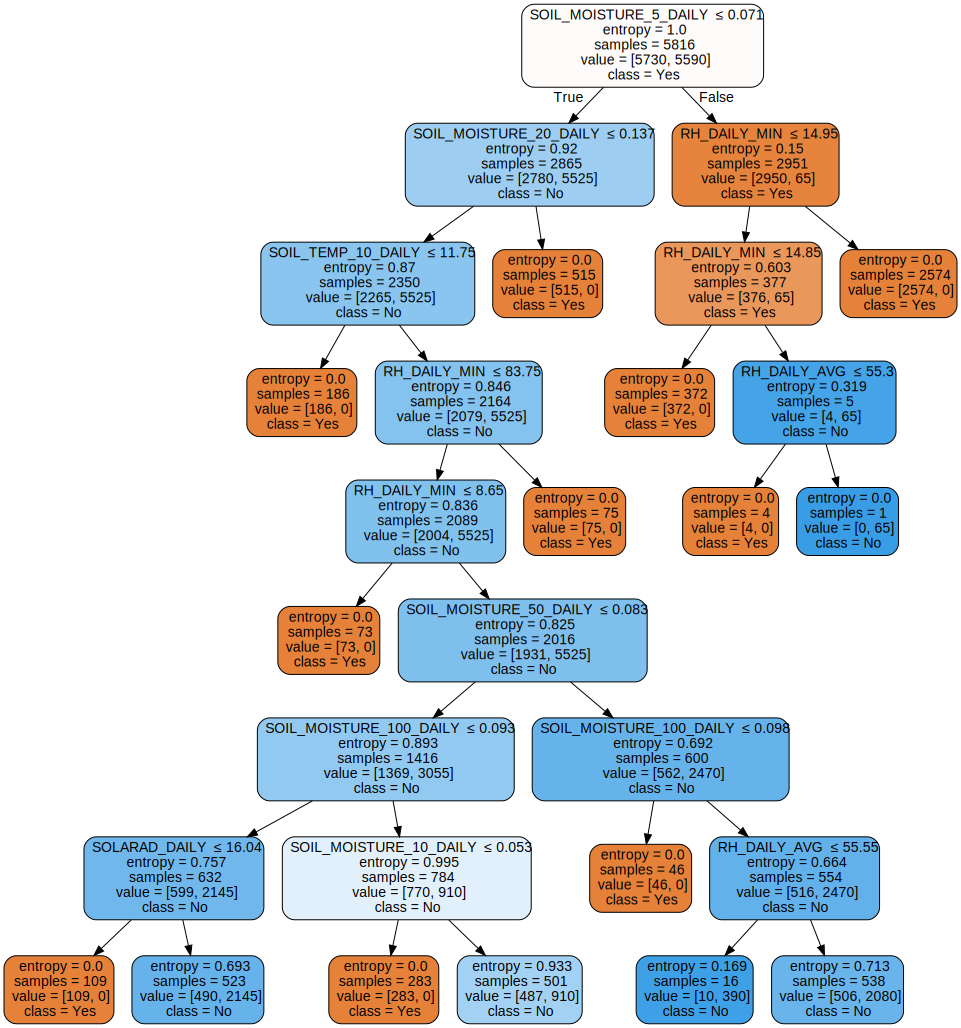

In [18]:
#Tuned DT model decision tree structure view
visualization = tree.export_graphviz(clf_Iteration1, out_file=None, feature_names=X.columns, class_names=['Yes','No'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(visualization)
graph

In [19]:
#cross validation score for improved tuned DT model decision tree: Accuracy
cross_val_score(clf_Iteration1,X,y,scoring="recall", cv=3)

array([0.60526316, 0.64102564, 0.63157895])

In [20]:
#Random Over Sampling the imbalanced Dataset
#Random Over Sampling duplicates the existing minority output class and add it to the pool
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = ros.fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [21]:
#Train the model with RandomOversamplier Balanced Data, and default DT model to get a baseline
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [22]:
#make a prediction with newly trained model and show confusion matrix base on how the model predicts on test data
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1405,   23],
       [   0, 1435]], dtype=int64)

In [23]:
#cross validation score for Oversamplied DT model: Accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.96227733, 0.95773664, 0.96715584, 0.97239693, 0.95248078])

In [24]:
#Get report on Oversamplied DT model
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1428
           1       0.98      1.00      0.99      1435

    accuracy                           0.99      2863
   macro avg       0.99      0.99      0.99      2863
weighted avg       0.99      0.99      0.99      2863



In [25]:
# Get feature importance Oversamplied DT model
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.018160
T_DAILY_AVG,0.024194
SOLARAD_DAILY,0.040168
SUR_TEMP_DAILY_MAX,0.049564
SUR_TEMP_DAILY_AVG,0.022008
RH_DAILY_MIN,0.080621
RH_DAILY_AVG,0.038871
SOIL_MOISTURE_5_DAILY,0.385904
SOIL_MOISTURE_10_DAILY,0.047063
SOIL_MOISTURE_20_DAILY,0.124577


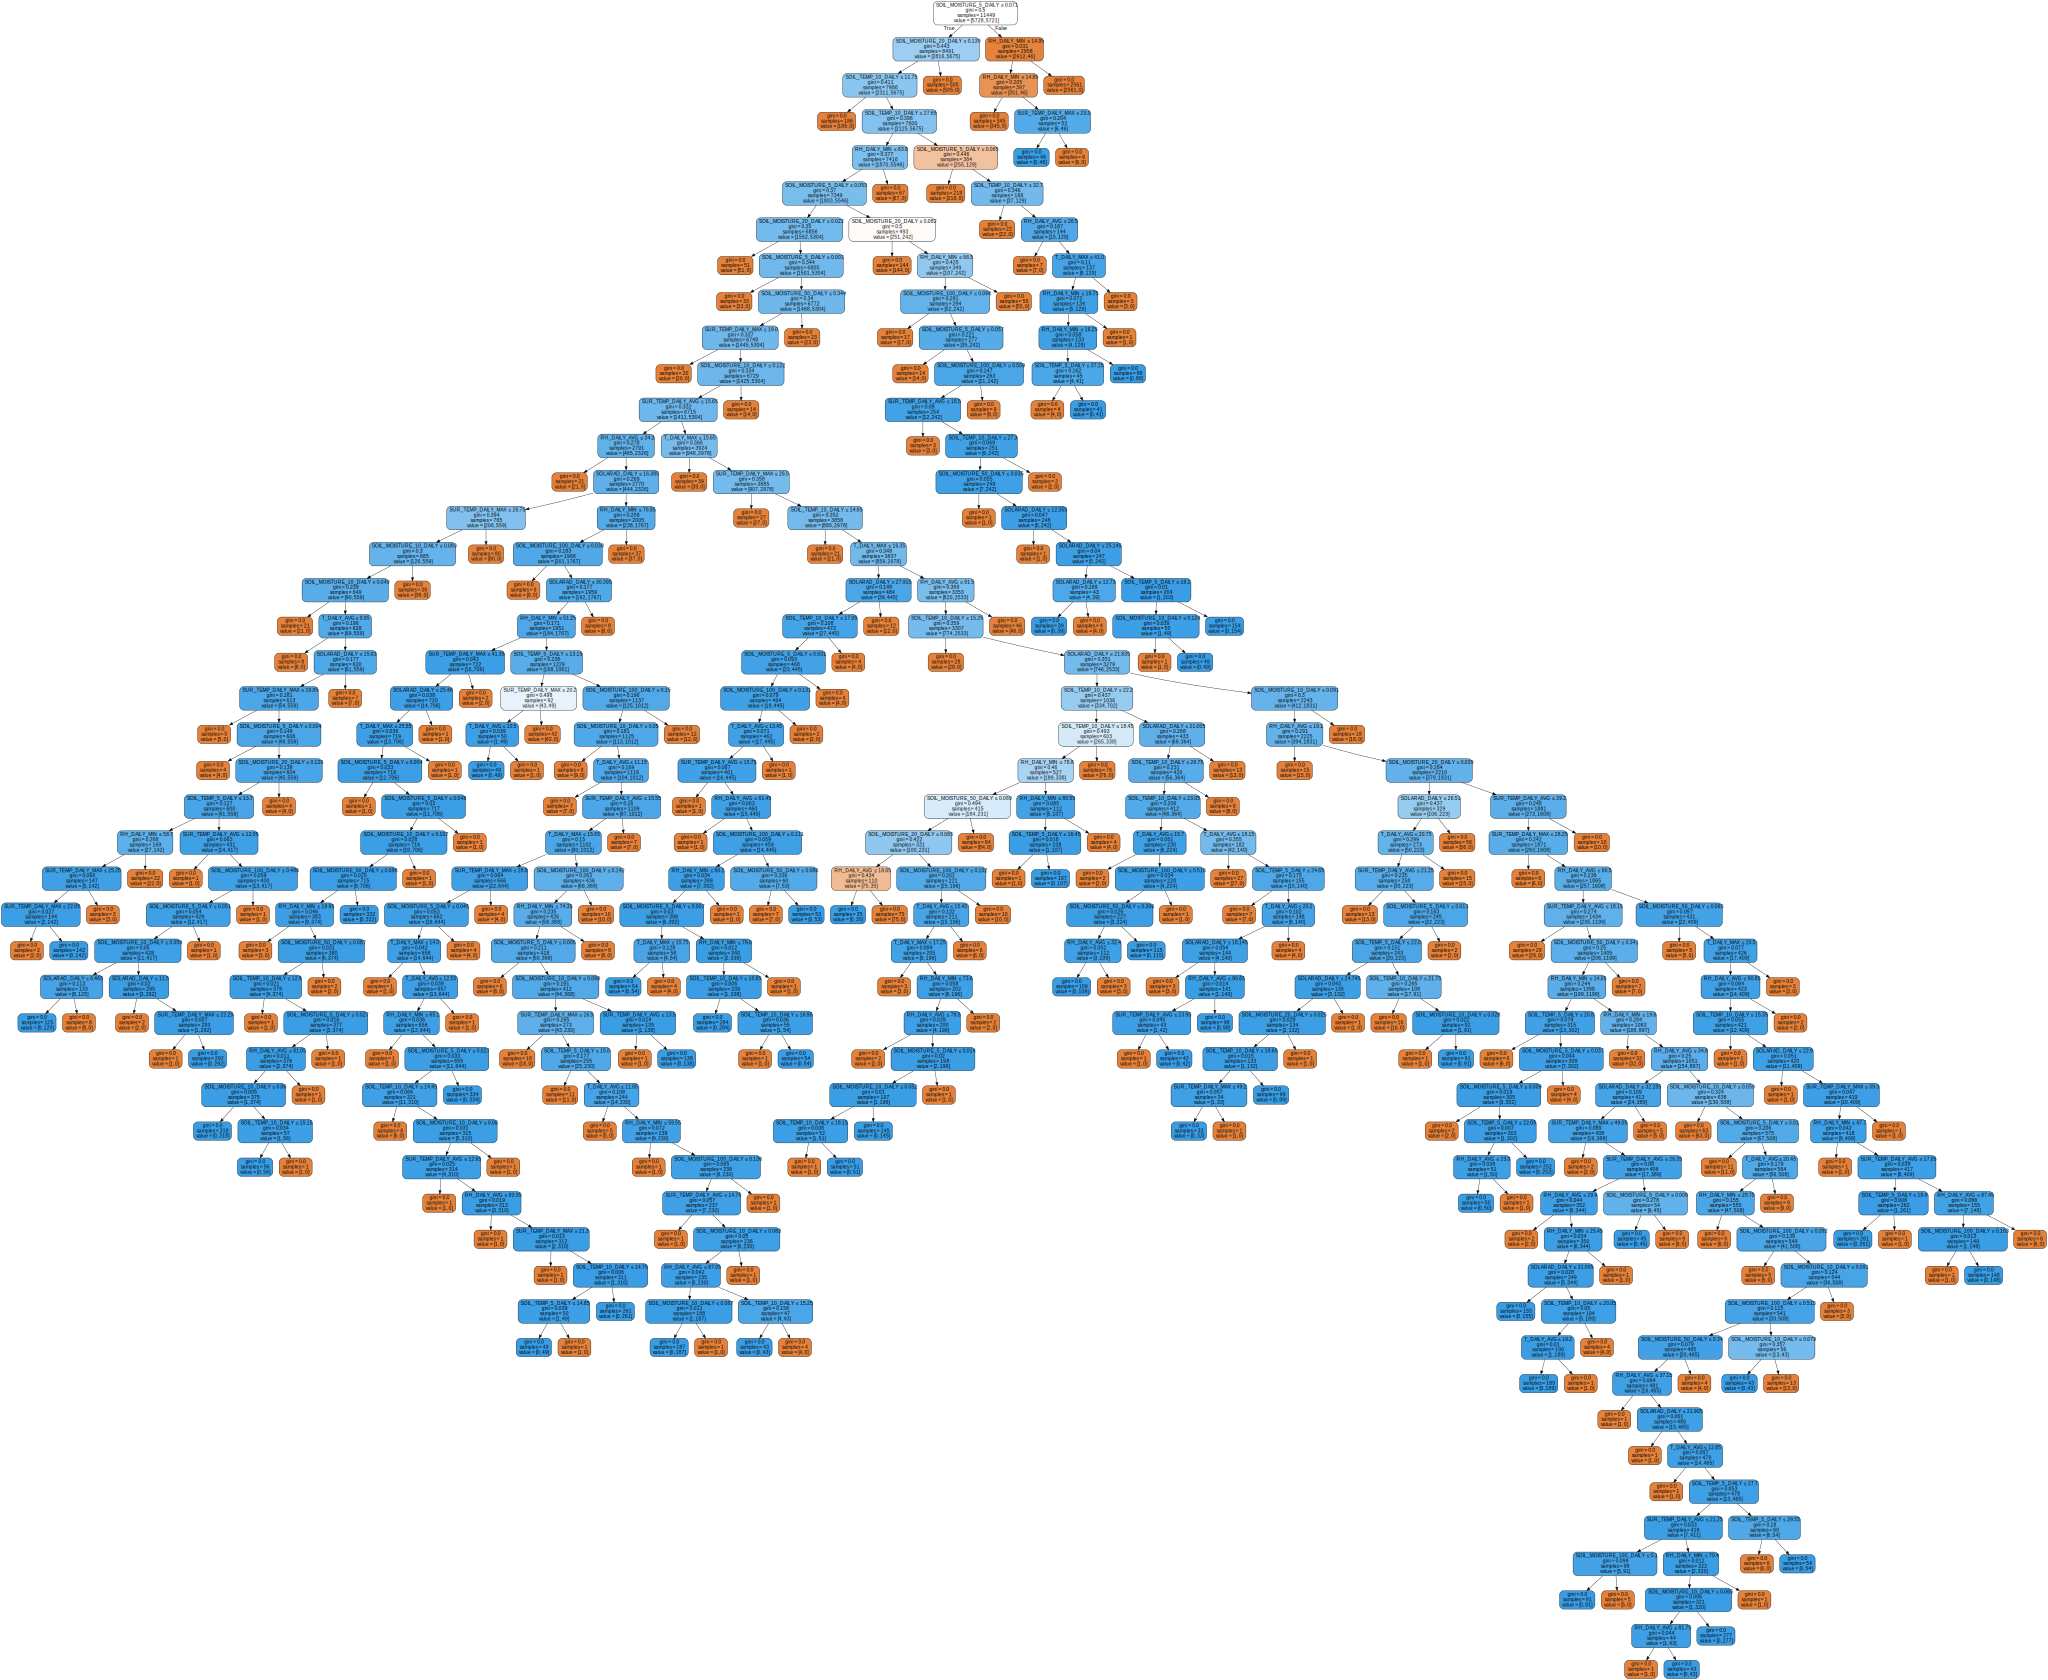

In [36]:
#Display the tree for Oversamplied DT model
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [13]:
#import SMOTE oversamplier
#SMOTE oversamplier is another way to oversample data, but instead of duplicate exact same minority data, it initiates relatively similar minority samples.
from imblearn.over_sampling import SMOTE
X = data.copy()
y = X['Fire']
X_resampled, y_resampled = SMOTE().fit_resample(X,y)
y_resampled = X_resampled['Fire']
X_resampled = X_resampled.drop(['Fire'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)

In [14]:
#Train the DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled = DecisionTreeClassifier()
clf_Iteration1_AfterResampled = clf_Iteration1_AfterResampled.fit(X_train, y_train)

In [15]:
#make another prediction using DT model with SMOTE oversampled dataset and default setting and show confusion matrix
predictions_iteration1_AfterResampled = clf_Iteration1_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration1_AfterResampled, labels=[0,1])

array([[1367,   73],
       [  31, 1392]], dtype=int64)

In [16]:
#cross validation score for DT model with SMOTE oversampled dataset and default setting: accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.8976598 , 0.90569333, 0.88015374, 0.92941999, 0.92033543])

In [17]:
#Get report on DT model with SMOTE oversampled dataset and default setting
print(classification_report(y_test,predictions_iteration1_AfterResampled))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1440
           1       0.95      0.98      0.96      1423

    accuracy                           0.96      2863
   macro avg       0.96      0.96      0.96      2863
weighted avg       0.96      0.96      0.96      2863



In [18]:
# Get feature importance of DT model with SMOTE oversampled dataset and default setting
clf_Iteration1_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration1_AfterResampled.feature_importances_, index = feature_names)

,0
T_DAILY_MAX,0.035976
T_DAILY_AVG,0.020414
P_DAILY_CALC,0.008066
SOLARAD_DAILY,0.040161
SUR_TEMP_DAILY_MAX,0.036500
SUR_TEMP_DAILY_AVG,0.018424
RH_DAILY_MIN,0.058135
RH_DAILY_AVG,0.037892
SOIL_MOISTURE_5_DAILY,0.434905
SOIL_MOISTURE_10_DAILY,0.035638


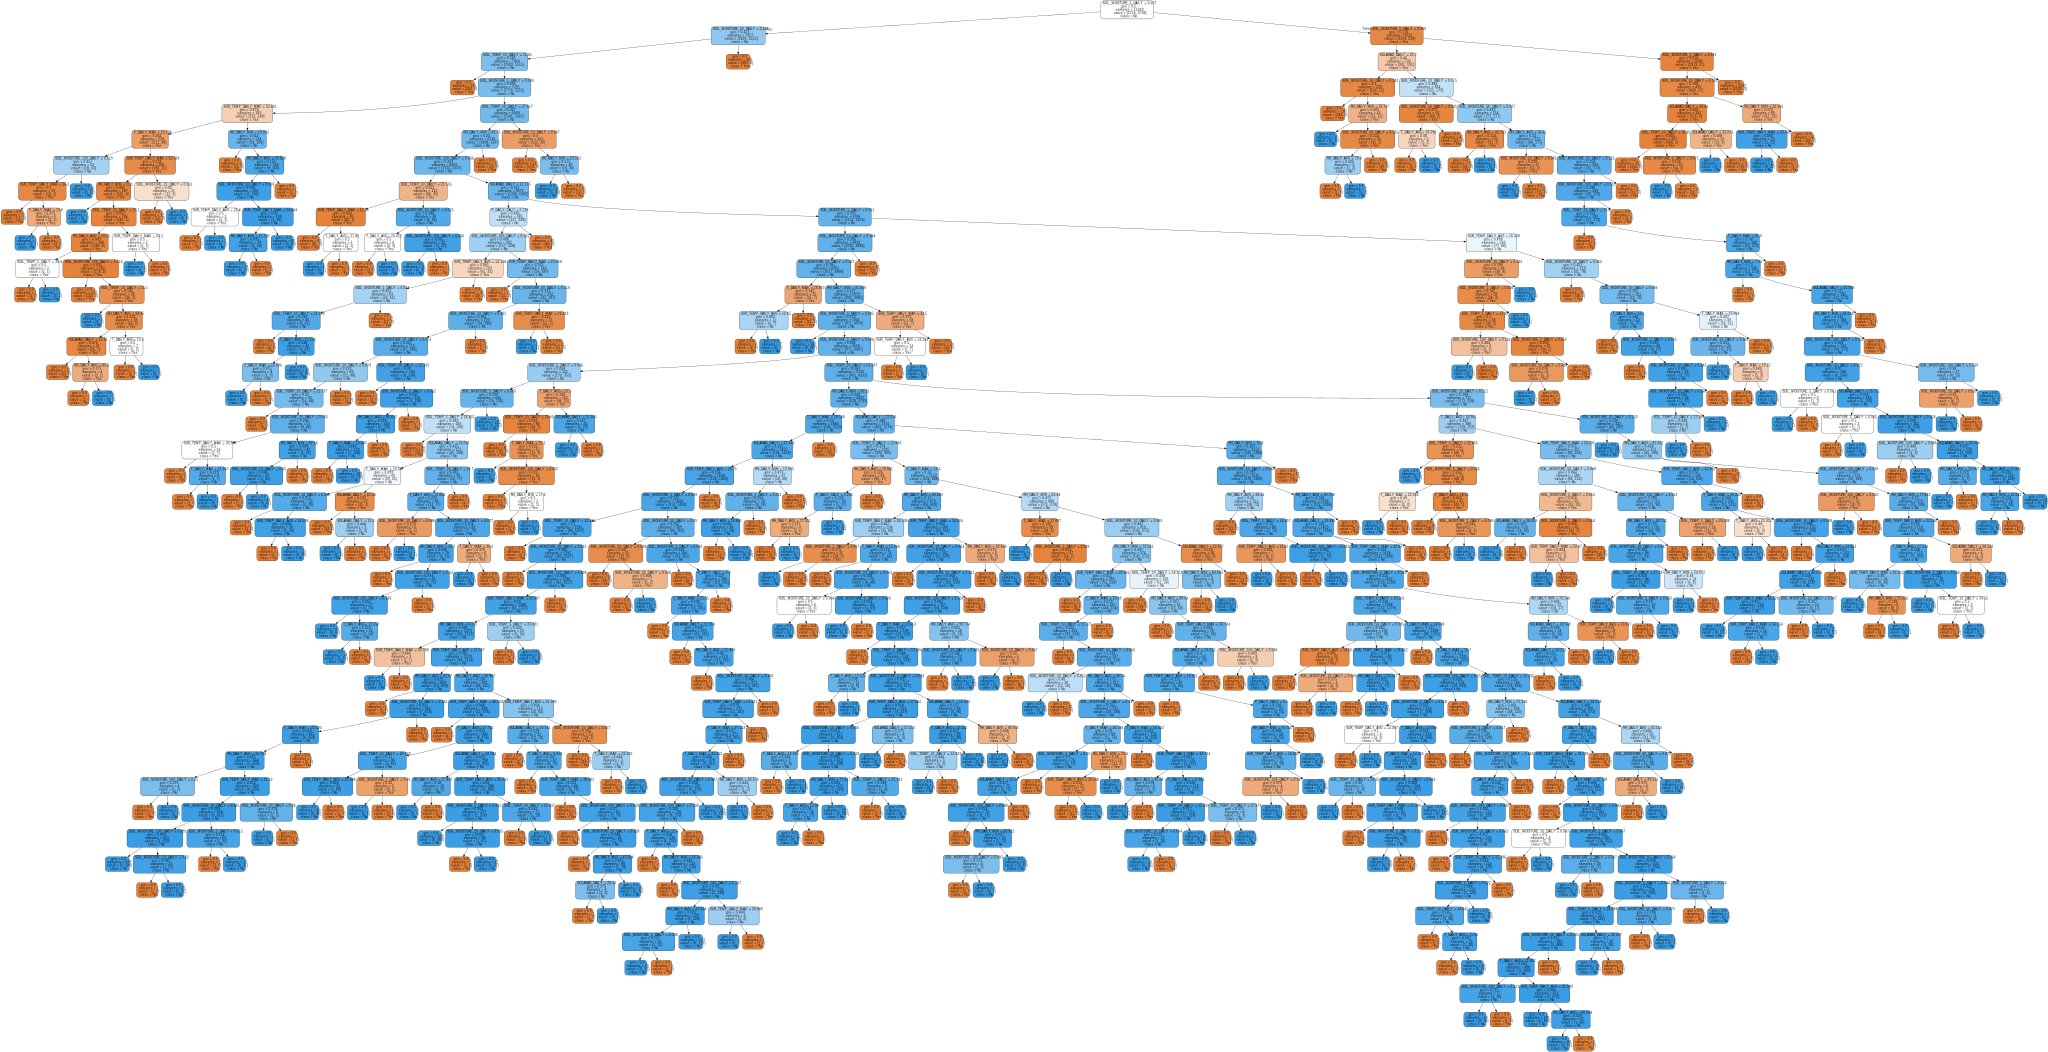

In [19]:
#Display the tree for DT model with SMOTE oversampled dataset and default setting
visualization = tree.export_graphviz(clf_Iteration1_AfterResampled, out_file=None, feature_names=X_resampled.columns, class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph

In [20]:
#Train the DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled = DecisionTreeClassifier(max_depth=30,random_state=4,criterion="entropy")
clf_Iteration2_AfterResampled = clf_Iteration2_AfterResampled.fit(X_train, y_train)

In [21]:
#make another prediction using DT model with SMOTE oversampled dataset and Tuned hyperparameter and show confusion matrix
predictions_iteration2_AfterResampled = clf_Iteration2_AfterResampled.predict(X_test)
confusion_matrix(y_test, predictions_iteration2_AfterResampled, labels=[0,1])

array([[1368,   72],
       [  24, 1399]], dtype=int64)

In [22]:
#cross validation score for DT model with SMOTE oversampled dataset and Tuned hyperparameter : accuracy
cross_val_score(clf_Iteration1_AfterResampled,X_resampled,y_resampled,scoring="accuracy", cv=5)

array([0.90254977, 0.90359762, 0.87491265, 0.93081761, 0.92382949])

In [26]:
#Get report on DT model with SMOTE oversampled dataset and Tuned hyperparameter
print(classification_report(y_test,predictions_iteration2_AfterResampled))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1440
           1       0.95      0.98      0.97      1423

    accuracy                           0.97      2863
   macro avg       0.97      0.97      0.97      2863
weighted avg       0.97      0.97      0.97      2863



In [27]:
# Get feature importance of DT model with SMOTE oversampled dataset and Tuned hyperparameter
clf_Iteration2_AfterResampled.feature_importances_
feature_names = X_resampled.columns
pd.DataFrame(clf_Iteration2_AfterResampled.feature_importances_, index=feature_names)

,0
T_DAILY_MAX,0.017948
T_DAILY_AVG,0.027553
P_DAILY_CALC,0.016369
SOLARAD_DAILY,0.045823
SUR_TEMP_DAILY_MAX,0.037078
SUR_TEMP_DAILY_AVG,0.013909
RH_DAILY_MIN,0.067065
RH_DAILY_AVG,0.034062
SOIL_MOISTURE_5_DAILY,0.438516
SOIL_MOISTURE_10_DAILY,0.053932


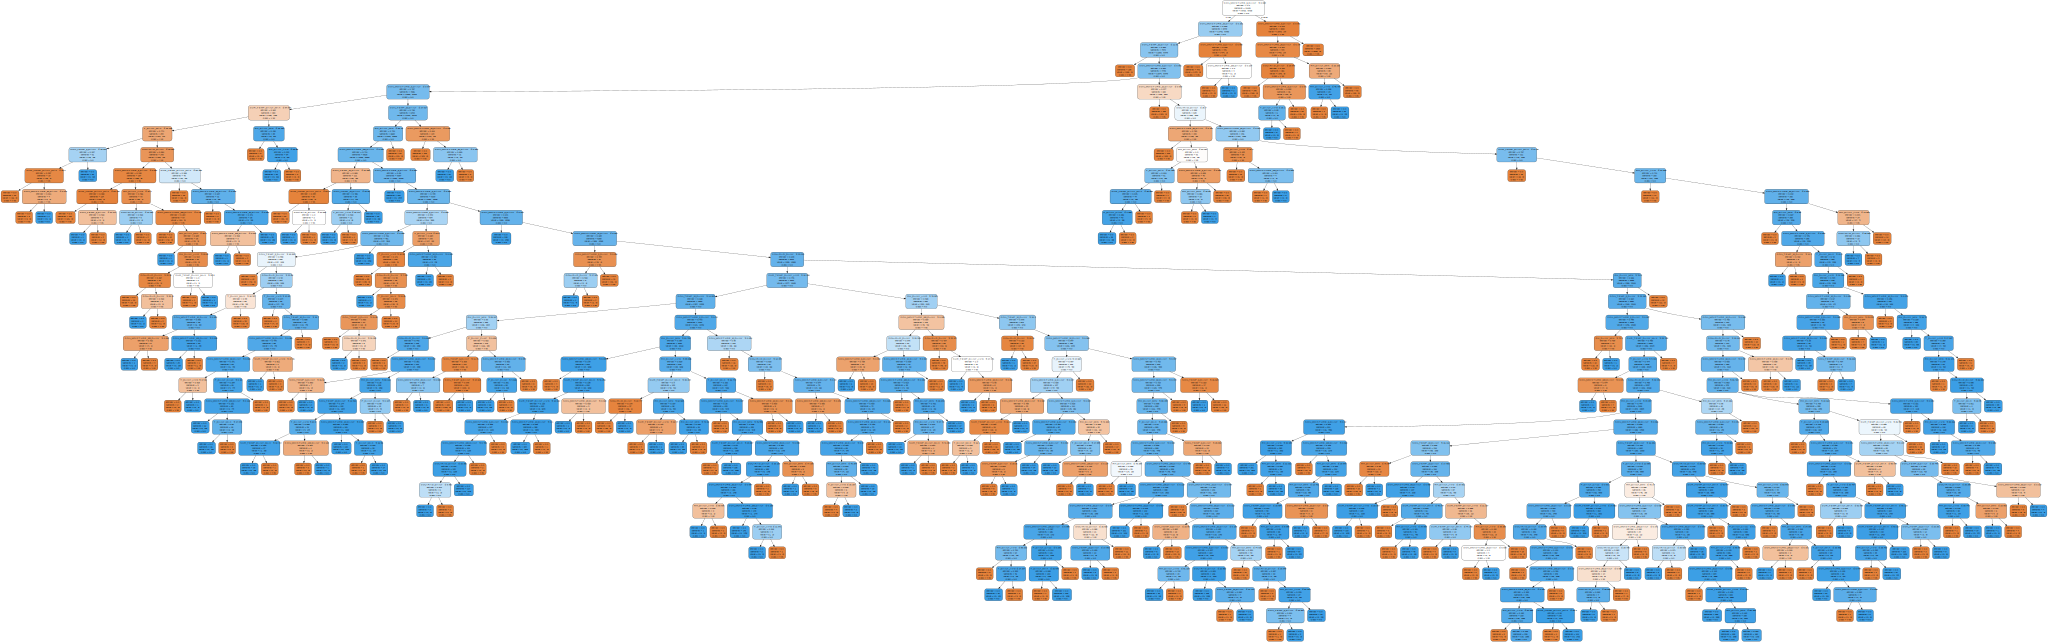

In [28]:
#Display the tree for DT model with SMOTE oversampled dataset and Tuned hyperparameter
visualization = tree.export_graphviz(clf_Iteration2_AfterResampled, out_file=None, feature_names=X_resampled.columns,
                                     class_names=['Yes', 'No'],
                                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(visualization)
graph